# Creating an ANOVA Table for a Non-Linear Regression

### By. Mo

## Formulas to know

### Solving for the beta values in your regression
 $ \Large \beta = (X^TX)^{-1}X^TY $

### Calculating Yhat

$ \Large \hat{Y} = X \beta $

### Calculating Ymean

$ \Large Y_\mu = \dfrac{1}{n} \sum_{i=1}^n Y_i $

### Calculating RSS

$ \Large RSS = \sum_{i=1}^n (Y_i - \hat{Y_i})^2 $

### Calculating TSS

$ \Large TSS = \sum_{i=1}^n (Y_i - Y_\mu)^2 $

### Calculating ESS

$ \Large ESS = TSS - RSS $

### Calculating F-Stat

$ \Large F = \dfrac{\tfrac{ESS}{m}}{\tfrac{RSS}{n - m - 1}} $

### Calculating R^2

$ \Large R^2 = 1 - \dfrac{RSS}{TSS} $

### Calculating Adj. R^2

$ \Large AR^2 = 1 - \dfrac{(1 - R^2)(n - 1)}{(n - m - 1)} $

### Calculating Standard Error

$ \Large S.E = \dfrac{RSS}{n - m + 1}diagonal \Big ((X^TX)^{-1} \Big )$

### Calculating Test Statistic

$ \Large TStat = \dfrac{\beta}{S.E} $

In [1]:
# Lets start by importing some libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create some fake data

x = [5, 6, 3, 1, 2, 5, 1, 9, 9, 4, 7, 12, 13, 5, 8]
y = [2, 3, 5, 8, 13, 21, 17, 14, 9, 4, 3, 9, 2, 1, 6]

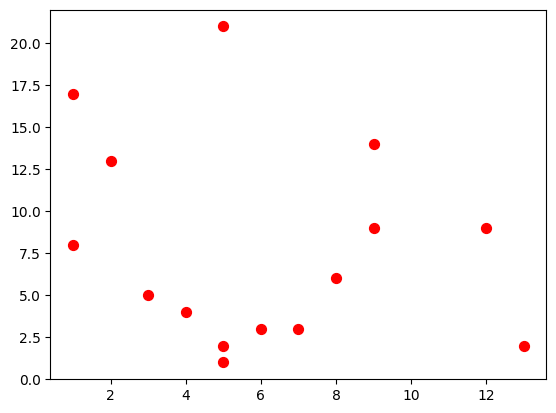

In [3]:
# Plot the fake data in a scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, color='red', s=50)

### Model Used
In this non-linear regression, we will use the following model


$ \Large \hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 e^X_1 $

In [4]:
# Prepare the data for the regression

# Squares values
def Square(q):
    return q**2

# Gives values the e base
def Exp(q):
    return np.exp(q)

# Build X matrix by adding 1 for the intercept and squaring and raising the value to e to the power of x
X = []
X.append(np.ones(len(x)).tolist())
X.append(x)
X.append(list(map(Square, x)))
X.append(list(map(Exp, x)))

# Final matrix is built and transposed
X = np.array(X).T
Y = np.array(y)

In [5]:
# Calculate Beta & Yhat & the mean of Y
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
Yhat = X @ beta
Ymu = np.mean(Y)
print(beta.tolist())

[16.220787950345674, -3.759429404861977, 0.3339692176691432, -5.070450843763216e-05]


In [6]:
# Check to see if Y - Yhat sum = 0
print(np.sum(Y - Yhat))

-2.0046186932631826e-12


In [7]:
# Calculate RSS & TSS & ESS
RSS = np.sum((Y - Yhat)**2)
TSS = np.sum((Y - Ymu)**2)
ESS = TSS - RSS

print(RSS, TSS, ESS)

381.7381691769257 512.4 130.6618308230743


In [8]:
# Calculate F-Statistic
n, m = X.shape
m -= 1

F = (ESS/m)/(RSS/(n - m - 1))

print("F-Statistic: ", F)

F-Statistic:  1.2550313758710316


In [9]:
# Calculate R^2 & Adj. R^2
R2 = 1 - RSS/TSS
AdjR2 = 1 - (1 - R2)*(n - 1)/(n - m - 1)

print(f'RSq: {R2} | AdjRsq: {AdjR2}')

RSq: 0.25499966983425904 | AdjRsq: 0.05181776160723883


In [10]:
# Calculate Standard Error
se = ((RSS/(n - len(X[0])))*np.diagonal(np.linalg.inv(X.T @ X)))**0.5

print(se.tolist())

[5.265379520527584, 2.1826237242311843, 0.198768913498449, 3.1599981408769336e-05]


In [11]:
# Compute the test statistics
test_stat = beta / se

print(test_stat.tolist())

[3.080649341060295, -1.7224358752840978, 1.6801883744851742, -1.6045739958429568]


### The only two beta coefficients which are significant are Beta2 and Beta3, overall this model sucks due to the outliers

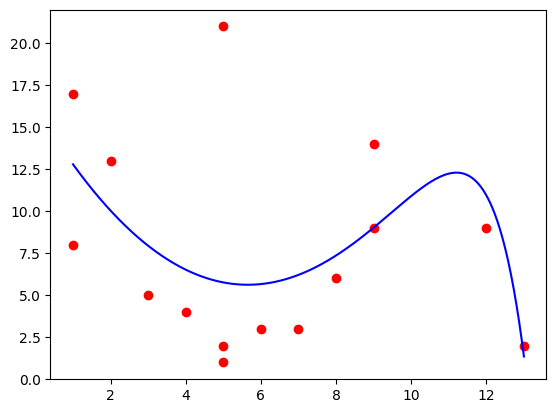

In [12]:
# Plot the regression line

# Set increment
da = 0.01

# Fetch list of numbers
ux = np.arange(np.min(x), np.max(x)+da, da)

# Create lists to plot the regression line
ex, ey = [], []
for i in ux:
    ex.append(i)
    H = np.array([1, i, i**2, np.exp(i)])
    ey.append(H @ beta)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, color='red')
ax.plot(ex, ey, color='blue')

plt.show()